In [1]:
import pandas as pd

hospital = pd.read_csv('Distances/hospital dist.csv')
park = pd.read_csv('Distances/park dist.csv')
school = pd.read_csv('Distances/school dist.csv')
subway = pd.read_csv('Distances/subway dist.csv')

In [2]:
df = pd.read_csv('Data/OUTPUT_cleandata/df_clean.csv')

In [3]:
dfs = [hospital, park, school, subway, df]

for i in dfs:
    print(i.shape)

(83107, 57)
(62261, 76)
(62345, 59)
(62261, 47)
(62261, 41)


In [4]:
df['dist_park'] = park.iloc[:,-1:]
df['dist_subway'] = subway.iloc[:,-1:]
df['dist_hospital'] = hospital.iloc[:len(df), -1:]
df['dist_school'] = school.iloc[:len(df), -1:]

In [5]:
df = df.drop(columns=['block_pluto_x', 'block_pluto_y', 'Unnamed: 0'])
df.head()

,block,lot,address,zipcode,units_residential,units_commercial,saledate,bldg_age_at_sale_calc,log_saleprice,block_pluto,...,longitude,bin_ltdheight,bin_splitzone,bin_histdist,bin_landmark,far_calc,dist_park,dist_subway,dist_hospital,dist_school
0,375,28,738 EAST 6TH STREET,10009.0,11.0,0.0,2017-04-03,117.0,15.137266,375.0,...,-73.977946,0.0,1.0,0.0,0.0,3.716409,0.000879,0.009050,0.007082,0.001207
1,385,36,27 AVENUE C,10009.0,24.0,1.0,2017-07-11,107.0,15.470877,385.0,...,-73.981031,0.0,1.0,0.0,0.0,3.758491,0.000644,0.007157,0.005513,0.002245
2,392,6,153 AVENUE B,10009.0,5.0,0.0,2017-07-19,117.0,15.706361,392.0,...,-73.979857,0.0,1.0,0.0,0.0,3.943662,0.000317,0.004768,0.010503,0.001740
3,400,61,193 EAST 4TH STREET,10009.0,11.0,1.0,2017-11-13,117.0,15.853479,400.0,...,-73.984223,0.0,1.0,0.0,0.0,3.368928,0.001198,0.005776,0.009023,0.001944
4,373,40,"327 EAST 3 STREET, 1C",10009.0,0.0,0.0,2017-03-10,97.0,13.120361,373.0,...,-73.978423,0.0,1.0,0.0,0.0,5.418462,0.000262,0.009351,0.005194,0.001071


In [6]:
df.to_csv('Data/OUTPUT_cleandata/df_dist.csv')

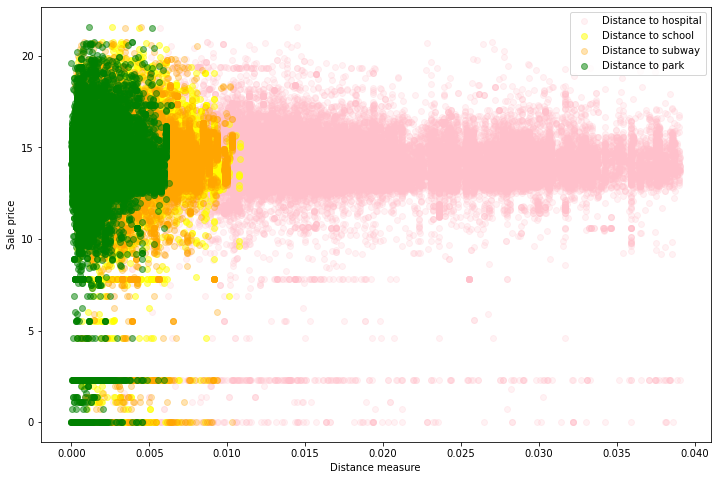

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(df.dist_hospital, df.log_saleprice, color='pink', alpha=0.2, label='Distance to hospital')
plt.scatter(df.dist_school, df.log_saleprice, color='yellow', alpha=0.5, label='Distance to school')
plt.scatter(df.dist_subway, df.log_saleprice, color='orange', alpha=0.3, label='Distance to subway')
plt.scatter(df.dist_park, df.log_saleprice, color='green', alpha=0.5, label='Distance to park')
plt.xlabel('Distance measure')
plt.ylabel('Sale price')
plt.legend()
plt.show()